In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-sms1/spam.csv


In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('/kaggle/input/spam-sms1/spam.csv',encoding ='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
spam_df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [4]:
spam_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
#converting the value of ham and spam into 1 or 0
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
spam_df['v1'] = encoder.fit_transform(spam_df['v1'])

In [6]:
#validation things worked so far
spam_df.head()
spam_df.isnull().sum()

v1    0
v2    0
dtype: int64

In [7]:
#check the duplicate values
spam_df.duplicated().sum()

403

In [8]:
#removing the duplicate value
spam_df = spam_df.drop_duplicates(keep = 'first')
spam_df.duplicated().sum()

0

In [9]:
spam_df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
spam_df['num_character'] = spam_df['v2'].apply(len)
!pip  install nltk
import nltk
nltk.download('punkt')
spam_df['num_words'] = spam_df['v2'].apply(lambda x:len(nltk.word_tokenize(x)))
spam_df['num_sentence'] = spam_df['v2'].apply(lambda x : len(nltk.sent_tokenize(x)))
spam_df.head()

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


,v1,v2,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [11]:
#here we are going to convert the text data into suitable format
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
import string

def transformTexts(text):
    text = text.lower()
    #tokenizing the text based on the words in the text
    text = nltk.word_tokenize(text)
    #including all those characters which are alphabet or number
    y = []
    for i in text:
        if i.isalnum:
            y.append(i)
            
    #storing the value of y into the vaiable text
    text = y[:]
    y.clear()
    
    #Removing the unnecessary words such as 'how are you ' or something which is not importent 
    #down here the stopwords.words('english') is nothing but all the lame set of words as described above
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    #the last step is nothing but steming in the steming we basically convert every verb form into the simple form such as
    #if we have dancing or danced we will convert them into dance and so on for this need to import something  hehehehe
    
    text = y[:]
    y.clear()
    ps = PorterStemmer()
    
    for i in text:
        y.append(ps.stem(i))
    
    text = y[:]
    y.clear()
    
    return " ".join(text)

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [12]:
transformTexts('Hi Shehriar how are you? Did you eat my salad?And if you are dancing tell me I danced very well last time')

'hi shehriar eat salad danc tell danc well last time'

In [13]:
spam_df['transformed'] = spam_df['v2'].apply(transformTexts)

In [14]:
spam_df.head()

,v1,v2,num_character,num_words,num_sentence,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point crazy.. avail bugi n great wor...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


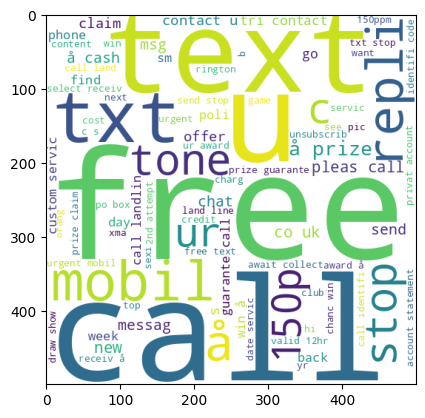

In [15]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(width = 500,height = 500,min_font_size = 10,background_color = 'white')
spam_wc = wc.generate(spam_df[spam_df['v1'] == 1]['transformed'].str.cat(sep = " "))
plt.imshow(spam_wc)


In [16]:
spam_corpus = []
for msg in spam_df[spam_df['v1']==1]['transformed'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
#same for the ham messages 
ham_corpus = []
for msg in spam_df[spam_df['v1']==0]['transformed'].tolist():
    for word in msg:
        ham_corpus.append(word)

In [17]:
spam_corpus_df = pd.DataFrame(spam_corpus)
spam_corpus_df.head()

,0
0,free
1,entri
2,2
3,wkli
4,comp


In [18]:
# # !pip install seaborn
# from collections import Counter
# import seaborn as sns
# sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])